In [36]:
import pandas as pd
import os
import csv
import math
import random
import seaborn as sns

In [37]:
pwd

'C:\\Users\\gizem\\yazlab proje'

In [38]:
data=pd.read_csv("skindata.txt",sep=",",engine="python")
print(data)

          b    r    g  cls
0        74   85  123    1
1        73   84  122    1
2        72   83  121    1
3        70   81  119    1
4        70   81  119    1
...     ...  ...  ...  ...
245052  163  162  112    2
245053  163  162  112    2
245054  163  162  112    2
245055  163  162  112    2
245056  255  255  255    2

[245057 rows x 4 columns]


In [39]:
# Bağımlı Değişkeni ( species) bir değişkene atadık
species = data.iloc[:,-1:].values

In [58]:
# Veri kümemizi test ve train şekinde bölüyoruz
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:-1],species,test_size=0.33,random_state=42)

In [59]:
# 3 tane farklı Naive Bayes Sınıfı vardır.
# GaussianNB : Tahmin edeceğiniz veri veya kolon sürekli (real,ondalıklı vs.) ise
# BernoulliNB : Tahmin edeceğiniz veri veya kolon ikili ise ( Evet/Hayır , Sigara içiyor/ İçmiyor vs.)
# MultinomialNB : Tahmin edeceğiniz veri veya kolon nominal ise ( Int sayılar )
# Duruma göre bu üç sınıftan birini seçebilirsiniz. Modelin başarı durumunu etkiler.
from sklearn.naive_bayes import GaussianNB

# GaussianNB sınıfından bir nesne ürettik
gnb = GaussianNB()

In [60]:
# Makineyi eğitiyoruz
egitim=gnb.fit(x_train, y_train.ravel()) #ravel()=flatten array

In [61]:
# Test veri kümemizi verdik ve  tahmin etmesini sağladık
result = gnb.predict(x_test)

In [62]:
# Karmaşıklık matrisi=Performans bilgisi Gerçek pozitif yalnış negatif yalnış pozitif gerçek negatif
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,result)
print(cm)

[[12404  4269]
 [ 2591 61605]]


In [63]:
# Başarı Oranı
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, result)
print(accuracy)

0.9151714501230385


<function matplotlib.pyplot.show(*args, **kw)>

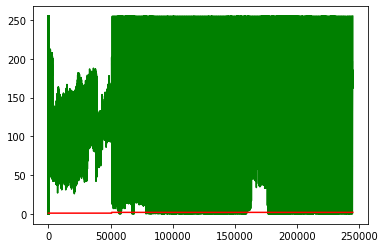

In [46]:
from matplotlib import pyplot as plt
plt.plot(data['r'],data['g'],data['b'],color='green')
plt.plot(labels['cls'],color='red')
plt.show

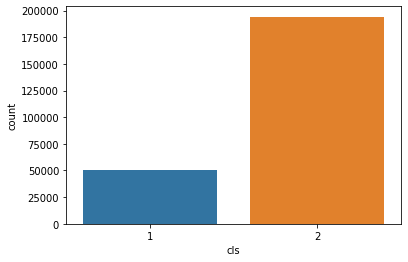

In [30]:
labels = pd.read_csv('skindata.txt')
labels = labels.iloc[:,0:4]
sns.countplot(labels['cls'])

In [31]:
y_test[:10]

array([[2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2]], dtype=int64)

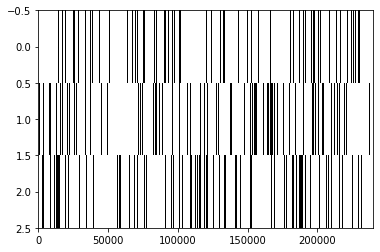

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# get some data with true @ probability 80 %
data = np.random.random((3, 240000)) > .2

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data, aspect='auto', cmap=plt.cm.gray, interpolation='nearest')